In [1]:
import os

import joblib
import pandas as pd
from sklearn.model_selection import KFold

from hyperflow import HyperFlowClassifier

In [2]:
train_df = pd.read_csv("../data/train_classification.csv")
test_df = pd.read_csv("../data/test_classification.csv")

In [3]:
trained_pipeline = HyperFlowClassifier(initial_runs=5, run_limit=10, n_jobs=1, included_classifiers=["lightgbm"],
                                       per_run_time_limit=60)

In [4]:
column_descriptions = {
    "id": "PassengerId",
    "target": "Survived",
    "ignore": "Name"
}

In [5]:
trained_pipeline.fit(
    X_train=train_df, X_test=test_df, column_descriptions=column_descriptions,
    should_store_intermediate_result=True,
    splitter=KFold(n_splits=3, shuffle=True, random_state=42), fit_ensemble_params=False
)

[INFO] [hyperflow.manager.data_manager.DataManager] X_train and X_test are both set.
[INFO] [hyperflow.hdl.hdl_constructor.HDL_Constructor] Using 'generic_recommend' method to initialize a generic DAG_workflow, 
to Adapt to various data such like NaN and categorical features.
[INFO] [hyperflow.estimator.classifier.HyperFlowClassifier] task_id:	1933473006ef89e09d9afb840c87c50a
[INFO] [hyperflow.estimator.classifier.HyperFlowClassifier] hdl_id:	08a9db6bbad09b339494595bfb77e593
[INFO] [hyperflow.estimator.classifier.HyperFlowClassifier] experiment_id:	1
[INFO] [dsmac.utils.io.cmd_reader.CMDReader] Output to smac3-output_2020-04-14_14:54:05_696028
[INFO] [dsmac.facade.smac_hpo_facade.SMAC4HPO] Optimizing a deterministic scenario for quality without a tuner timeout - will make SMAC deterministic and only evaluate one configuration per iteration!
[INFO] [dsmac.scenario.scenario.Scenario] No output directory for scenario logging specified -- scenario will not be logged.
[INFO] [dsmac.initial_

/home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


HyperFlowClassifier(hdl_constructor=None, highR_cat_threshold=0.5,
                    highR_nan_threshold=0.5, log_config=None, log_file=None,
                    random_state=42,
                    resource_manager=<hyperflow.manager.resource_manager.ResourceManager object at 0x7f17696cb0b8>,
                    tuner=None)

In [6]:
trained_pipeline.estimator

VoteClassifier(models=[GenericPipeline(memory=None,
                                       steps=[('0highR_nan->nan',
                                               DropAll(random_state=42)),
                                              ('1nan->{cat_name=cat_nan,num_name=num_nan}',
                                               SplitCatNum(cat_name='cat_nan',
                                                           num_name='num_nan',
                                                           random_state=42)),
                                              ('2num_nan->num',
                                               FillAbnormal(random_state=42)),
                                              ('3cat_nan->cat',
                                               FillCat(random_state=42,
                                                       strategy='most_frequent')),
                                              ('4cat->{highR=hig...
                                               LGB

In [7]:
hdl_constructor=trained_pipeline.hdl_constructors[0]

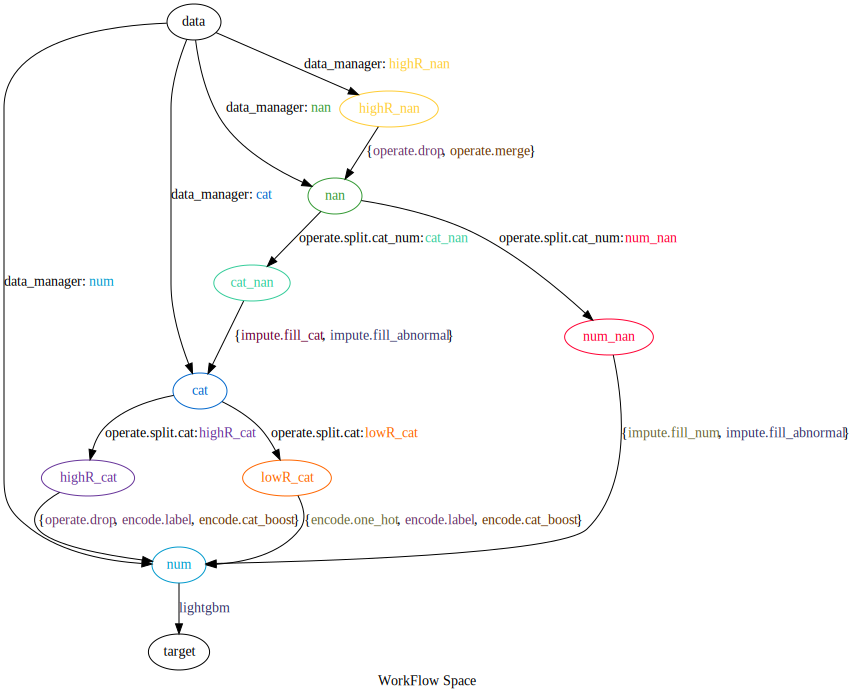

In [8]:
hdl_constructor.draw_workflow_space()

In [9]:
joblib.dump(trained_pipeline, "hyperflow_classification.bz2")

['hyperflow_classification.bz2']

In [10]:
predict_pipeline = joblib.load("hyperflow_classification.bz2")

In [11]:
predict_pipeline.predict(test_df)

[INFO] [hyperflow.estimator.classifier.HyperFlowClassifier] 'data_manager' is existing in HyperFlowEstimator, will not load it from database or create it.


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,